# Data Cleaning: Star Wars

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [ ]:
star_wars.head(10)

## Remove null respondents

In [ ]:
star_wars.columns

In [ ]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

## Convert Yes/No to Boolean and rename columns

In [ ]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = (
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no))

In [ ]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = (
    star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no))

In [ ]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

In [ ]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

In [ ]:
film_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(film_map)

In [ ]:
star_wars.head()

In [ ]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
})

In [ ]:
star_wars.head()

## Convert ranking columns to numeric and rename

In [ ]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

In [ ]:
star_wars.columns

## Find highest ranked movie

In [ ]:
film_means = star_wars[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']].mean()

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
index = np.arange(6)
width = 0.5
labels = ['I', 'II', 'III', 'IV', 'V', 'VI']
fig, ax = plt.subplots()
ax.bar(index, star_wars[star_wars.columns[9:15]].mean(), width = width)
ax.set_xticks(index)
ax.set_xticklabels(labels)
plt.show()

From the average rankings for the Star Wars movie we can see that the best ranked movie is Episode V, but the first released trilogy (Episodes IV - VI) are ranked much higher than the prequel trilogy (Epsidoes I - III). I believe that repondents are more partial to the 'original' movies than the second trilogy. 

In [ ]:
seen_sums = star_wars[star_wars.columns[3:9]].sum()
fig, ax = plt.subplots()
ax.bar(index, seen_sums, width = width, color = 'g')
ax.set_xticks(index)
ax.set_xticklabels(labels)
plt.show()

However, when you look at how many people have viewed each movie we can see that Episode V, which has the highest ranking, also has the most viewership. One way to control for this is to only look at rankings of those who have said they saw all 6 movies.

In [ ]:
seen_all = star_wars[star_wars[star_wars.columns[3:9]].all(1) == True]
fig, ax = plt.subplots()
ax.bar(index, seen_all[seen_all.columns[9:15]].mean(), width)
ax.set_xticks(index)
ax.set_xticklabels(labels)
plt.show()

Now we see for everyone who watched all three movies that the original trilogy was much more popular than the prequel. Episode V is still the highest ranked episode. 

## Comparison based on gender

In [62]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

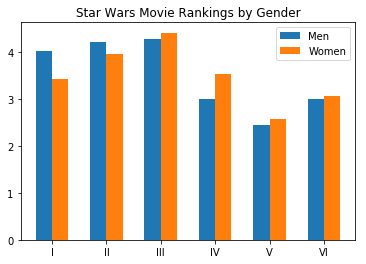

In [88]:
# highest ranked movie
d_width = 0.3
fig, ax = plt.subplots()
ax.bar(index, males[males.columns[9:15]].mean(), d_width, label = 'Men')
ax.bar(index + d_width, females[females.columns[9:15]].mean(), d_width, label = 'Women')
ax.set_xticks(index + d_width / 2)
ax.set_xticklabels(labels)
ax.legend(loc = "upper right")
ax.set_title('Star Wars Movie Rankings by Gender')
plt.show()

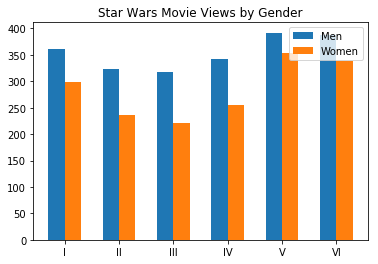

In [89]:
# most viewed movie 
fig, ax = plt.subplots()
ax.bar(index, males[males.columns[3:9]].sum(), d_width, label = 'Men')
ax.bar(index + d_width, females[females.columns[3:9]].sum(), d_width, label = 'Women')
ax.set_xticks(index + d_width / 2)
ax.set_xticklabels(labels)
ax.legend(loc = "upper right")
ax.set_title('Star Wars Movie Views by Gender')
plt.show()

This comparison shows that more men report seeing all of the Star Wars films though it seems that Epsiode V and VI have a smaller gap. Overall both genders like the original trilogy more than the prequel, but some episodes such as Episode I have a larger difference in ranking between genders. It would be interesting to compare the screen time of strong female characters throughout all the Star Wars movies and see if that plays a role in these rankings by gender.